In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
empresas_rfb = pd.read_csv('/content/drive/MyDrive/Data/empresa2009.csv')

ParserError: ignored

# Montando o dataset de trabalho:

## Importando os dados

A tabela empresas contém 7 colunas e 4.494.860 linhas, ocupando cerca de 240 mb na memória

In [ ]:
empresas_rfb = pd.read_csv('/content/drive/MyDrive/Data/empresa2009.csv', encoding='ISO-8859-1',decimal=',', sep=';' ,dtype=str, header=None, names=['cnpj_basico', 'razao_social', 'nat_jur', 'qual_resp', 'capital_social', 'porte_empresa', 'ente_resp']) #necessario colocaro ';'
print(empresas_rfb.shape)
empresas_rfb #relatar o erro de que o read_csv tenta usar o encoding utf8 e nao dá certo. decimal=',', #Latin 1 representa simbolos latinos

(4494860, 7)


,cnpj_basico,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp
0,36627987,MARIA LAUDECI SILVA DE ASSIS ALMEIDA 11182384862,2135,50,"000000002000,00",01,NaN
1,36627988,WILLIAN MEIRES DE MARINS 17802351782,2135,50,"000000000300,00",01,NaN
2,36627989,VERONICA TADEU PEREIRA 05548260707,2135,50,"000000002500,00",01,NaN
3,36627991,MONICA DE MORAIS ROCHA 40845063898,2135,50,"000000001000,00",01,NaN
4,36627992,HERON SILVA DE MELLO 10584718721,2135,50,"000000002000,00",01,NaN
...,...,...,...,...,...,...,...
4494855,41938341,ELETRICA BARRA DO PRATA LTDA,2062,49,"0,00",05,NaN
4494856,41938358,LINEU RAGNOLI,2135,50,"0,00",01,NaN
4494857,41938366,DISQUE BEBE LTDA,2062,49,"0,00",05,NaN
4494858,41938374,PEDRO DE PAULA ARAUJO,2135,50,"0,00",01,NaN


A tabela Estabelecimentos contém 30 colunas e 4.753.435 linhas, ocupando cerca de 1.1+ GB na memória

In [ ]:
estabelecimentos = pd.read_csv('/content/drive/MyDrive/Data/estabelecimentos.csv', encoding='ISO-8859-1', dtype=str, sep=';', decimal=',', header=None, names=['cnpj_basico', 'ordem', 'dv', 'matriz_filial', 'nome', 'situacao_cadastral', 'data_sit_cad',
'motivo_sit_cad', 'cidade_exterior', 'cod_pais', 'inicio_atividade', 'cnae_principal', 'cnae_secund',
'tipo','logradouro','numero','complemento','bairro','cep','uf','municipio_rfb','ddd',
'tel','ddd2','tel2','dddfax','fax','email', 'sit_especial', 'data_sit_especial'])
print(estabelecimentos.shape)
estabelecimentos.head()

(4753435, 30)


,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial
0,39304501,0001,05,1,KATIA MODAS,2,20201005,0,NaN,NaN,20201005,4781400,NaN,10A RUA,B LOT PORTO CESAR,153,CASA,GERERAU,61880000,CE,991,85,81963757,NaN,NaN,NaN,NaN,KATIASOUSACHAGAS@GMAIL.COM,NaN,NaN
1,39304513,0001,21,1,NaN,2,20201005,0,NaN,NaN,20201005,4929901,4929902,RUA,ARAPORA,32,NaN,RANCHO ALEGRE,38475000,MG,4855,34,91194763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39304523,0001,67,1,ECOTRACE ARQUITETURA SUSTENTAVEL,2,20201005,0,NaN,NaN,20201005,7111100,"7119703,7119799,7410202",RUA,LAURO MULLER,00076,APT 103,BOTAFOGO,22290160,RJ,6001,41,96869828,NaN,NaN,NaN,NaN,MEUCNPJ@CONTABILIZEI.COM.BR,NaN,NaN
3,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN
4,39304544,0001,82,1,CAT - COZINHA DE ALIMENTOS TRADICIONAIS,2,20201005,0,NaN,NaN,20201005,5620104,5620102,RUA,DOS PINHEIROS,139,NaN,JARDIM TORRAO DE OURO,12229318,SP,7099,12,32079659,NaN,NaN,NaN,NaN,PAULA_GIAN@HOTMAIL.COM,NaN,NaN


In [ ]:
estabelecimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4753435 entries, 0 to 4753434
Data columns (total 30 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   cnpj_basico         object
 1   ordem               object
 2   dv                  object
 3   matriz_filial       object
 4   nome                object
 5   situacao_cadastral  object
 6   data_sit_cad        object
 7   motivo_sit_cad      object
 8   cidade_exterior     object
 9   cod_pais            object
 10  inicio_atividade    object
 11  cnae_principal      object
 12  cnae_secund         object
 13  tipo                object
 14  logradouro          object
 15  numero              object
 16  complemento         object
 17  bairro              object
 18  cep                 object
 19  uf                  object
 20  municipio_rfb       object
 21  ddd                 object
 22  tel                 object
 23  ddd2                object
 24  tel2                object
 25  dddfax            

### Convertendo os dados para string para que o pandas faça o merge corretamente :

In [ ]:
# estabelecimentos['cnpj_basico'] = estabelecimentos['cnpj_basico'].astype(str)

# empresas_rfb['cnpj_basico'] = empresas_rfb['cnpj_basico'].astype(str)

### Fazendo o merge

# Farei agora o merge ao dataset empresas, que contém informações como o Capital Social das empresas, o porte (se é micro empresa, por exemplo), a natureza jurídica (ex. S.A, limitada, etc). No entanto, como os dados disponíveis publicamente no site da RFB estão fragmentados, ou seja, não há correspondência do arquivo nomeado por exemplo 'empresa1' com o arquivo 'estabelecimento1', quando eu fiz o inner join, a intersecção resultante foi de +- 100.000 linhas entre as duas tabelas, diminuindo muito o tamanho do dataset. Decidi pelo left JOIN pois informação bem interessante seria reduzida sobre a tabela estabelecimentos. Dei a preferência por deixar à esquerda a tabela Estabelecimentos porque ela que contém o target do dataset e suas variáveis independentes.

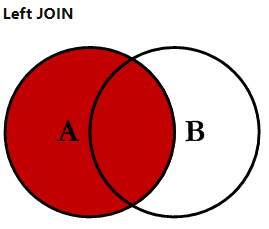

In [ ]:
data = pd.merge(estabelecimentos, empresas_rfb, how='left', on='cnpj_basico') #inner merge, só o que achar

#estabelecimentos['cnpj_basico'] = estabelecimentos.merge(empresas_rfb, on='cnpj_basico', how='inner')['cnpj_basico'].values
data

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp
0,39304501,0001,05,1,KATIA MODAS,2,20201005,0,NaN,NaN,20201005,4781400,NaN,10A RUA,B LOT PORTO CESAR,153,CASA,GERERAU,61880000,CE,991,85,81963757,NaN,NaN,NaN,NaN,KATIASOUSACHAGAS@GMAIL.COM,NaN,NaN,KATIA MARIA SOUZA DAS CHAGAS 91152992368,2135,50,"000000001000,00",01,NaN
1,39304513,0001,21,1,NaN,2,20201005,0,NaN,NaN,20201005,4929901,4929902,RUA,ARAPORA,32,NaN,RANCHO ALEGRE,38475000,MG,4855,34,91194763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VALDENIR FERNANDES DE MENDONCA 05806484602,2135,50,"000000010000,00",01,NaN
2,39304523,0001,67,1,ECOTRACE ARQUITETURA SUSTENTAVEL,2,20201005,0,NaN,NaN,20201005,7111100,"7119703,7119799,7410202",RUA,LAURO MULLER,00076,APT 103,BOTAFOGO,22290160,RJ,6001,41,96869828,NaN,NaN,NaN,NaN,MEUCNPJ@CONTABILIZEI.COM.BR,NaN,NaN,BACELAR E AZEVEDO ARQUITETURA LTDA,2062,49,"000000001000,00",01,NaN
3,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN
4,39304544,0001,82,1,CAT - COZINHA DE ALIMENTOS TRADICIONAIS,2,20201005,0,NaN,NaN,20201005,5620104,5620102,RUA,DOS PINHEIROS,139,NaN,JARDIM TORRAO DE OURO,12229318,SP,7099,12,32079659,NaN,NaN,NaN,NaN,PAULA_GIAN@HOTMAIL.COM,NaN,NaN,SUELI APARECIDA DE PAULA 07127830835,2135,50,"000000003000,00",01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753430,39039725,0001,29,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,RUA,LEOPOLDO MOREIRA MAIA,290,CASA,CAMPOS ELISIOS,37275000,MG,4403,0,0,NaN,NaN,0,0,romario.evolucao@gmail.com,NaN,NaN,ELEICAO 2020 NATHANE DE SOUSA SILVA VEREADOR,4090,51,"0,00",05,NaN
4753431,39039737,0001,53,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,PRACA,DOMINGOS JOSE MARTINS,S N,NaN,CENTRO,29330000,ES,5655,0,0,NaN,NaN,0,0,NOSSOPOVONOSSAMISSAO@GMAIL.COM,NaN,NaN,ELEICAO 2020 ALCIONE RODRIGUES DE CARVALHO VER...,4090,51,"0,00",05,NaN
4753432,39039749,0001,88,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,RUA,RUA ODETE VILLELA PRATA,156,CASA,RESIDENCIAL RIO DE JANEIRO,38041348,MG,5401,0,0,NaN,NaN,0,0,leandrovisao10@gmail.com,NaN,NaN,ELEICAO 2020 HUDSON CAMPOS DE LIMA VEREADOR,4090,51,"0,00",05,NaN
4753433,39039760,0001,48,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,RUA,JOSE MARIA PIRES,10,NaN,NOVA ESPERANCA,28750000,RJ,5917,0,0,NaN,NaN,0,0,CANDIDATOS_R@OUTLOOK.COM,NaN,NaN,ELEICAO 2020 MURILLO PORTUGAL DE REZENDE FELIX...,4090,51,"0,00",05,NaN


A tabela resultante do merge por LEFT JOIN das tabelas estabelecimentos e empresas naturalmente tem o mesmo número de linhas da tabela estabelecimento, mas possui 36 colunas. Não há 37 colunas, pois o merge foi feito por meio da variável 'cnpj_basico' que é comum nas duas tabelas.

In [ ]:
estabelecimentos.shape #igual ao tamanho do merge, portanto left join

(4753435, 30)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4753435 entries, 0 to 4753434
Data columns (total 36 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   cnpj_basico         object
 1   ordem               object
 2   dv                  object
 3   matriz_filial       object
 4   nome                object
 5   situacao_cadastral  object
 6   data_sit_cad        object
 7   motivo_sit_cad      object
 8   cidade_exterior     object
 9   cod_pais            object
 10  inicio_atividade    object
 11  cnae_principal      object
 12  cnae_secund         object
 13  tipo                object
 14  logradouro          object
 15  numero              object
 16  complemento         object
 17  bairro              object
 18  cep                 object
 19  uf                  object
 20  municipio_rfb       object
 21  ddd                 object
 22  tel                 object
 23  ddd2                object
 24  tel2                object
 25  dddfax            

Para o projeto, decidi reduzir o tamanho do dataset que possui mais de 1.3 GB, selecionando o Estado de maior atividade econômica, que é São Paulo. Essa seleção terá 1.361.981 registros (cerca de 3 milhões de registros a menos) e 36 colunas

In [ ]:
sp = data[data['uf'] == 'SP'] #Selecionarei apenas dados de Sampa para a análise
sp

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp
3,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN
4,39304544,0001,82,1,CAT - COZINHA DE ALIMENTOS TRADICIONAIS,2,20201005,0,NaN,NaN,20201005,5620104,5620102,RUA,DOS PINHEIROS,139,NaN,JARDIM TORRAO DE OURO,12229318,SP,7099,12,32079659,NaN,NaN,NaN,NaN,PAULA_GIAN@HOTMAIL.COM,NaN,NaN,SUELI APARECIDA DE PAULA 07127830835,2135,50,"000000003000,00",01,NaN
6,39304564,0001,53,1,BRUNO LESSA,2,20201005,0,NaN,NaN,20201005,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135,50,"000000001000,00",01,NaN
11,39304616,0001,91,1,TALLADEGA BBQ,2,20201005,0,NaN,NaN,20201005,5611201,"4729699,5611203,5611205",AVENIDA,CASA VERDE,1800,NaN,CASA VERDE,02520100,SP,7107,11,99999999,NaN,NaN,NaN,NaN,AAA@AAAA.COM.BR,NaN,NaN,TALLADEGA BBQ PARRILLA CHURRASCARIA LTDA,2062,49,"000000050000,00",03,NaN
14,39304644,0001,09,1,AEDIFICATORE IMOVEIS,2,20201005,0,NaN,NaN,20201005,4120400,6810201,AVENIDA,EMILIA MARCHI MARTINI,688,NaN,JARDIM SOARES,13840090,SP,6715,19,38314281,19,38314736,19,38314736,ESCRITORIOATUAL@YAHOO.COM.BR,NaN,NaN,AEDIFICATORE IMOVEIS A & S LTDA,2062,49,"000000020000,00",01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753420,39039609,0001,00,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,RUA,RUA COELHO NETO,230,NaN,VILA XAVIER,19802070,SP,6179,0,0,NaN,NaN,0,0,rodolfoafif@gmail.com,NaN,NaN,ELEICAO 2020 VALDEMIR CUPERTINO DUARTE VEREADOR,4090,51,"0,00",05,NaN
4753423,39039643,0001,84,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,RUA,FUNDADORES,07,NaN,CENTRO,16260000,SP,6351,0,0,NaN,NaN,0,0,leonardo_balaio@hotmail.com,NaN,NaN,ELEICAO 2020 RONALDO MAESTA VEREADOR,4090,51,"0,00",05,NaN
4753426,39039679,0001,68,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,RUA,APRIGIO DE ARAUJO,864,SALA 108,CENTRO,14160030,SP,7135,0,0,NaN,NaN,0,0,TIAO.MACEDO13@GMAIL.COM,NaN,NaN,ELEICAO 2020 SILVIA APARECIDA GUIMARAES VEREADOR,4090,51,"0,00",05,NaN
4753427,39039690,0001,28,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,AVENIDA,AVENIDA JOSE DE SOUZA CAMPOS,2200,ATE 900 LADO PAR,NOVA CAMPINAS,13092123,SP,6291,0,0,NaN,NaN,0,0,rosanalehdias@gmail.com,NaN,NaN,ELEICAO 2020 ROSANA LEH DIAS VEREADOR,4090,51,"0,00",05,NaN


Como a pergunta do projeto é se conseguimos prever se uma empresa está ativa ou fechada, estimando uma probabilidade (risco), selecionarei apenas as empresas que estão ativas (0) ou que fecharam por liquidação voluntária (1). O dataset obtido é de 1.009.714 de linhas

In [ ]:
#### QUERO SABER APENAS DAS EMPRESAS NA ATIVA E AQUELAS QUE FORAM FECHADAS POR LIQUIDAÇÃO 
#### VOLUNTÁRIA, MOTIVO_SIT_CAD = 1

um = sp['motivo_sit_cad'] == '1'
dois = sp['motivo_sit_cad'] == '0'
sp_binario = sp[um|dois].copy()
sp_binario.shape

(1009714, 36)

In [ ]:
sp_binario.columns, sp_binario.shape

(Index(['cnpj_basico', 'ordem', 'dv', 'matriz_filial', 'nome',
        'situacao_cadastral', 'data_sit_cad', 'motivo_sit_cad',
        'cidade_exterior', 'cod_pais', 'inicio_atividade', 'cnae_principal',
        'cnae_secund', 'tipo', 'logradouro', 'numero', 'complemento', 'bairro',
        'cep', 'uf', 'municipio_rfb', 'ddd', 'tel', 'ddd2', 'tel2', 'dddfax',
        'fax', 'email', 'sit_especial', 'data_sit_especial', 'razao_social',
        'nat_jur', 'qual_resp', 'capital_social', 'porte_empresa', 'ente_resp'],
       dtype='object'), (1009714, 36))

### Acredito que há informações importantes para calcular o risco de uma empresa fechar ou continuar funcionando em dados econômicos do IBGE. Vamos juntar agora com a tabela do Tesouro Nacional (há a correspondência entre o código do municipio da RFB com o código do IBGE) que será o link entre as demais tabelas que serão adicionadas:

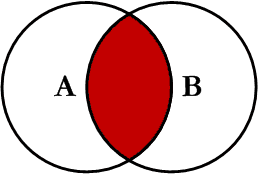

In [ ]:
tabmuni = pd.read_csv('/content/drive/MyDrive/Data/Tesouro/tabmuni2.csv', sep=';',header=None, dtype=str,
                      encoding='ISO-8859-1',
                      names=['municipio_rfb', 'cnpj_m', 'descricao', 'UF', 'CodigoIbge'])
del tabmuni['cnpj_m']
tabmuni

,municipio_rfb,descricao,UF,CodigoIbge
0,ï»¿municipio_rfb,DESCRIÃÃO,UF,CodigoIbge
1,1,GUAJARA-MIRIM,RO,1100106
2,2,ALTO ALEGRE DOS PARECIS,RO,1100379
3,3,PORTO VELHO,RO,1100205
4,8,CUJUBIM,RO,1100940
...,...,...,...,...
5585,1190,MOJUI DOS CAMPOS,PA,1504752
5586,1192,BALNEARIO RINCAO,SC,4220000
5587,1194,PESCARIA BRAVA,SC,4212650
5588,1196,PARAISO DAS AGUAS,MS,5006275


In [ ]:
# tabmuni['municipio_rfb'] = tabmuni['municipio_rfb'].astype(str) #Melhor string na hora do merge que object, dá menos erro.
# sp_binario['municipio_rfb'] = sp_binario['municipio_rfb'].astype(str)
          

In [ ]:
sp_binario_municipio = pd.merge(sp_binario, tabmuni, on='municipio_rfb') #1009714 rows × 39 columns
sp_binario_municipio['CodigoIbge']= sp_binario_municipio['CodigoIbge'].astype(str)

sp_binario_municipio #Há a intersecção dos elementos

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,descricao,UF,CodigoIbge
0,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN,SAO PAULO,SP,3550308
1,39304564,0001,53,1,BRUNO LESSA,2,20201005,0,NaN,NaN,20201005,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135,50,"000000001000,00",01,NaN,SAO PAULO,SP,3550308
2,39304616,0001,91,1,TALLADEGA BBQ,2,20201005,0,NaN,NaN,20201005,5611201,"4729699,5611203,5611205",AVENIDA,CASA VERDE,1800,NaN,CASA VERDE,02520100,SP,7107,11,99999999,NaN,NaN,NaN,NaN,AAA@AAAA.COM.BR,NaN,NaN,TALLADEGA BBQ PARRILLA CHURRASCARIA LTDA,2062,49,"000000050000,00",03,NaN,SAO PAULO,SP,3550308
3,39304717,0001,62,1,HORTIFRUTI NOSSO LAR,2,20201005,0,NaN,NaN,20201005,4724500,NaN,RUA,ENGENHEIRO CARLO GRAZIA,135,NaN,CIDADE TIRADENTES,08475410,SP,7107,11,51243081,NaN,NaN,NaN,NaN,JACIARAFABIOKK@GMAIL.COM,NaN,NaN,JACIARA ALVES MACIEL DA SILVA 29089936866,2135,50,"000000003000,00",01,NaN,SAO PAULO,SP,3550308
4,37419658,0003,04,2,GOLDEN BLUE,2,20201005,0,NaN,NaN,20201005,4635403,"4672900,4685100,4686902,4930202",RUA,ABRAHAO CALUX,103,NaN,VILA MOINHO VELHO,04286100,SP,7107,64,33221440,NaN,NaN,NaN,NaN,GOLDENBLUEIND@GMAIL.COM,NaN,NaN,GOLDEN BLUE BEBIDAS E DERIVADOS EIRELI,2305,65,"000000104500,00",03,NaN,SAO PAULO,SP,3550308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009709,35607687,0001,02,1,GIG @ NET,2,20191125,0,NaN,NaN,20191125,6110803,6190601,RUA,DONA MARIA FAUSTINA,241,NaN,CENTRO,17475000,SP,6651,14,37327645,14,37324648,14,37327645,MARKACONTABIL2010@HOTMAIL.COM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LUCIANOPOLIS,SP,3527504
1009710,36984322,0001,60,1,NaN,2,20200206,0,NaN,NaN,20200206,151203,NaN,FAZENDA,CANDEIAS,SN,NaN,ALAMBARI,17479899,SP,6651,14,32821989,NaN,NaN,14,32821989,REGIONAL@AONET.COM.BR,NaN,NaN,MOISES RIBEIRO DE QUEIROZ,4120,59,"0,00",05,NaN,LUCIANOPOLIS,SP,3527504
1009711,37588106,0001,68,1,COMERCIAL TG,2,20200701,0,NaN,NaN,20200701,4712100,NaN,RUA,DONA MARIA FAUSTINA,171,NaN,CENTRO,17475021,SP,6651,14,98498337,NaN,NaN,NaN,NaN,DRIETIFFANY_NUNES@HOTMAIL.COM,NaN,NaN,ADRIANA NUNES DOS SANTOS 38581484824,2135,50,"000000001000,00",01,NaN,LUCIANOPOLIS,SP,3527504
1009712,37917664,0001,20,1,NaN,2,20200730,0,NaN,NaN,20200730,4744005,4930202,RUA,SAO PEDRO,249,NaN,CENTRO,17475001,SP,6651,14,32825382,NaN,NaN,NaN,NaN,NASCIMENTO.ESCRITORIO@GMAIL.COM,NaN,NaN,SIMEI FARIA DE SOUZA,2135,50,"000000080000,00",01,NaN,LUCIANOPOLIS,SP,3527504


In [ ]:
sp_binario_municipio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009714 entries, 0 to 1009713
Data columns (total 39 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   cnpj_basico         1009714 non-null  object
 1   ordem               1009714 non-null  object
 2   dv                  1009714 non-null  object
 3   matriz_filial       1009714 non-null  object
 4   nome                524911 non-null   object
 5   situacao_cadastral  1009714 non-null  object
 6   data_sit_cad        1009714 non-null  object
 7   motivo_sit_cad      1009714 non-null  object
 8   cidade_exterior     0 non-null        object
 9   cod_pais            203 non-null      object
 10  inicio_atividade    1009714 non-null  object
 11  cnae_principal      1009714 non-null  object
 12  cnae_secund         444930 non-null   object
 13  tipo                1005620 non-null  object
 14  logradouro          1009709 non-null  object
 15  numero              1009708 non-

In [ ]:
#testa se o merge deu certo, se não deu certo mostra linhas que ficaram de fora, se deu certo o output é vazio

df_merged = pd.merge(sp_binario, 
                     tabmuni,
                     how = 'outer',
                     left_on = ['municipio_rfb'],
                     right_on = ['municipio_rfb'], 
                     indicator = True)

deleted_rows = df_merged.loc[df_merged._merge == "left_only",]
deleted_rows #se retornasse alguma coisa era porque o merge nao deu certo, iria mostrar o que ficou de fora

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,descricao,UF,CodigoIbge,_merge


In [ ]:
deleted_rows.shape, deleted_rows['municipio_rfb'].value_counts()

((0, 40), Series([], Name: municipio_rfb, dtype: int64))

## Importando tabela de Renda Média do IBGE

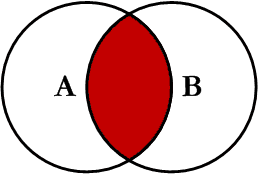

In [ ]:
tabela3527 = pd.read_csv('/content/drive/MyDrive/Data/IBGE/tabela3527.csv' , sep=',', dtype=str, header=None, names=['CodigoIbge', 'Cidade', 'Renda_Media_Mensal'])
tabela3527['CodigoIbge'] = tabela3527['CodigoIbge'].astype(str)
tabela3527.shape

(5578, 3)

Provavelmente a renda média mensal dos habitantes do municipio devem ter alguma relação com o sucesso ou fracasso de um negócio aberto no local.

### Adicionar tabela de Renda Media do IBGE

In [ ]:
sp_ibge = pd.merge(sp_binario_municipio,tabela3527, on='CodigoIbge')


## Adicionar Tabela de PIB dos Municipios

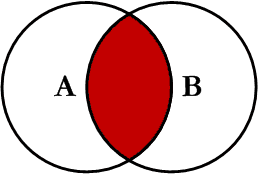

In [ ]:
pib = pd.read_csv('/content/drive/MyDrive/Data/IBGE/tabela5938.csv', sep=',', dtype=str, header=None, names=['CodigoIbge', 'Cidade_PIB', 'PIB'])

In [ ]:
#Fazendo o merge:

sp_ibge_PIB = pd.merge(sp_ibge, pib, on='CodigoIbge')
sp_ibge

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,descricao,UF,CodigoIbge,Cidade,Renda_Media_Mensal
0,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN,SAO PAULO,SP,3550308,São Paulo (SP),4427.54
1,39304564,0001,53,1,BRUNO LESSA,2,20201005,0,NaN,NaN,20201005,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135,50,"000000001000,00",01,NaN,SAO PAULO,SP,3550308,São Paulo (SP),4427.54
2,39304616,0001,91,1,TALLADEGA BBQ,2,20201005,0,NaN,NaN,20201005,5611201,"4729699,5611203,5611205",AVENIDA,CASA VERDE,1800,NaN,CASA VERDE,02520100,SP,7107,11,99999999,NaN,NaN,NaN,NaN,AAA@AAAA.COM.BR,NaN,NaN,TALLADEGA BBQ PARRILLA CHURRASCARIA LTDA,2062,49,"000000050000,00",03,NaN,SAO PAULO,SP,3550308,São Paulo (SP),4427.54
3,39304717,0001,62,1,HORTIFRUTI NOSSO LAR,2,20201005,0,NaN,NaN,20201005,4724500,NaN,RUA,ENGENHEIRO CARLO GRAZIA,135,NaN,CIDADE TIRADENTES,08475410,SP,7107,11,51243081,NaN,NaN,NaN,NaN,JACIARAFABIOKK@GMAIL.COM,NaN,NaN,JACIARA ALVES MACIEL DA SILVA 29089936866,2135,50,"000000003000,00",01,NaN,SAO PAULO,SP,3550308,São Paulo (SP),4427.54
4,37419658,0003,04,2,GOLDEN BLUE,2,20201005,0,NaN,NaN,20201005,4635403,"4672900,4685100,4686902,4930202",RUA,ABRAHAO CALUX,103,NaN,VILA MOINHO VELHO,04286100,SP,7107,64,33221440,NaN,NaN,NaN,NaN,GOLDENBLUEIND@GMAIL.COM,NaN,NaN,GOLDEN BLUE BEBIDAS E DERIVADOS EIRELI,2305,65,"000000104500,00",03,NaN,SAO PAULO,SP,3550308,São Paulo (SP),4427.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009709,35607687,0001,02,1,GIG @ NET,2,20191125,0,NaN,NaN,20191125,6110803,6190601,RUA,DONA MARIA FAUSTINA,241,NaN,CENTRO,17475000,SP,6651,14,37327645,14,37324648,14,37327645,MARKACONTABIL2010@HOTMAIL.COM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LUCIANOPOLIS,SP,3527504,Lucianópolis (SP),2458.57
1009710,36984322,0001,60,1,NaN,2,20200206,0,NaN,NaN,20200206,151203,NaN,FAZENDA,CANDEIAS,SN,NaN,ALAMBARI,17479899,SP,6651,14,32821989,NaN,NaN,14,32821989,REGIONAL@AONET.COM.BR,NaN,NaN,MOISES RIBEIRO DE QUEIROZ,4120,59,"0,00",05,NaN,LUCIANOPOLIS,SP,3527504,Lucianópolis (SP),2458.57
1009711,37588106,0001,68,1,COMERCIAL TG,2,20200701,0,NaN,NaN,20200701,4712100,NaN,RUA,DONA MARIA FAUSTINA,171,NaN,CENTRO,17475021,SP,6651,14,98498337,NaN,NaN,NaN,NaN,DRIETIFFANY_NUNES@HOTMAIL.COM,NaN,NaN,ADRIANA NUNES DOS SANTOS 38581484824,2135,50,"000000001000,00",01,NaN,LUCIANOPOLIS,SP,3527504,Lucianópolis (SP),2458.57
1009712,37917664,0001,20,1,NaN,2,20200730,0,NaN,NaN,20200730,4744005,4930202,RUA,SAO PEDRO,249,NaN,CENTRO,17475001,SP,6651,14,32825382,NaN,NaN,NaN,NaN,NASCIMENTO.ESCRITORIO@GMAIL.COM,NaN,NaN,SIMEI FARIA DE SOUZA,2135,50,"000000080000,00",01,NaN,LUCIANOPOLIS,SP,3527504,Lucianópolis (SP),2458.57


### Operação de merge com a tabela Populacao  do IBGE:

In [ ]:
populacao = pd.read_csv('/content/drive/MyDrive/Data/IBGE/tabela6579.csv', sep=',', dtype=str, header=None, names=['CodigoIbge', 'Cidade_POP', 'populacao'])
del populacao['Cidade_POP']


In [ ]:
sp_ibge_PIB = pd.merge(sp_ibge_PIB, populacao, on='CodigoIbge')

In [ ]:
sp_ibge_PIB.shape

(1009714, 44)

Após todos esses merges com tabelas do IBGE aumentamos apenas o número de colunas, mostrando que os merges foram bem suscedidos.

## Os tipos de dados (dtypes) do dataset:

In [ ]:
sp_ibge_PIB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009714 entries, 0 to 1009713
Data columns (total 44 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   cnpj_basico         1009714 non-null  object
 1   ordem               1009714 non-null  object
 2   dv                  1009714 non-null  object
 3   matriz_filial       1009714 non-null  object
 4   nome                524911 non-null   object
 5   situacao_cadastral  1009714 non-null  object
 6   data_sit_cad        1009714 non-null  object
 7   motivo_sit_cad      1009714 non-null  object
 8   cidade_exterior     0 non-null        object
 9   cod_pais            203 non-null      object
 10  inicio_atividade    1009714 non-null  object
 11  cnae_principal      1009714 non-null  object
 12  cnae_secund         444930 non-null   object
 13  tipo                1005620 non-null  object
 14  logradouro          1009709 non-null  object
 15  numero              1009708 non-

Deletar colunas repetidas:

In [ ]:
del sp_ibge_PIB['Cidade_PIB']
del sp_ibge_PIB['Cidade']
#Deletar também as colunas que são tudo NULL:


In [ ]:
# del sp_ibge_PIB['CNPJ'] #DELETAR O CNPJ DOS MUNICIPIOS

In [ ]:
sp_ibge_PIB.head(2)

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,descricao,UF,CodigoIbge,Renda_Media_Mensal,PIB,populacao
0,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN,SAO PAULO,SP,3550308,4427.54,714683362,12325232
1,39304564,0001,53,1,BRUNO LESSA,2,20201005,0,NaN,NaN,20201005,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135,50,"000000001000,00",01,NaN,SAO PAULO,SP,3550308,4427.54,714683362,12325232


Renomear colunas com nomes nebulosos:

In [ ]:
sp_ibge_PIB.rename(columns = {'descricao': 'municipio'}, inplace=True)

In [ ]:
#colocar tudo em lowercase:
sp_ibge_PIB.columns = map(str.lower, sp_ibge_PIB.columns)
sp_ibge_PIB.head(2)


,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,municipio,uf,codigoibge,renda_media_mensal,pib,populacao
0,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN,SAO PAULO,SP,3550308,4427.54,714683362,12325232
1,39304564,0001,53,1,BRUNO LESSA,2,20201005,0,NaN,NaN,20201005,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135,50,"000000001000,00",01,NaN,SAO PAULO,SP,3550308,4427.54,714683362,12325232


In [ ]:
data_final = sp_ibge_PIB.copy()
data_final.head(2)

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,municipio,uf,codigoibge,renda_media_mensal,pib,populacao
0,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN,SAO PAULO,SP,3550308,4427.54,714683362,12325232
1,39304564,0001,53,1,BRUNO LESSA,2,20201005,0,NaN,NaN,20201005,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135,50,"000000001000,00",01,NaN,SAO PAULO,SP,3550308,4427.54,714683362,12325232


In [ ]:
data_final.shape

(1009714, 42)

In [ ]:
data_final.to_csv('/content/drive/MyDrive/Data/dataset_final_merge.csv', index=False) #para nao gerar uma coluna unnamed0
#https://pandas.pydata.org/pandas-docs/version/0.18.0/generated/pandas.DataFrame.to_csv.html

In [ ]:
data_final.shape

(1009714, 42)

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009714 entries, 0 to 1009713
Data columns (total 42 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   cnpj_basico         1009714 non-null  object        
 1   ordem               1009714 non-null  object        
 2   dv                  1009714 non-null  object        
 3   matriz_filial       1009714 non-null  object        
 4   nome                524911 non-null   object        
 5   situacao_cadastral  1009714 non-null  object        
 6   data_sit_cad        1004463 non-null  datetime64[ns]
 7   motivo_sit_cad      1009714 non-null  object        
 8   cidade_exterior     0 non-null        object        
 9   cod_pais            203 non-null      object        
 10  inicio_atividade    1009714 non-null  datetime64[ns]
 11  cnae_principal      1009714 non-null  object        
 12  cnae_secund         444930 non-null   object        
 13  tipo        